In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns

plt.style.use('dark_background')


# load the data and then convert launch date and extract the year
df = pd.read_csv("satcat.tsv", sep="\t", encoding="utf-8", low_memory=False)
df["LDate"] = pd.to_datetime(df["LDate"], errors="coerce")
df["Year"] = df["LDate"].dt.year
df = df.dropna(subset=["Year"])
df["Year"] = df["Year"].astype(int)


df

,#JCAT,Satcat,Launch_Tag,Piece,Type,Name,PLName,LDate,Parent,SDate,...,Perigee,PF,Apogee,AF,Inc,IF,OpOrbit,OQUAL,AltNames,Year
0,S00001,00001,1957 ALP,1957 ALP 1,R2,8K71PS No. M1-10 Stage 2,8K71A M1-10 (M1-1PS),1957-10-04,-,1957 Oct 4 1933,...,214,,938,,65.10,,LLEO/I,-,-,1957
1,S00002,00002,1957 ALP,1957 ALP 2,P,1-y ISZ,PS-1,1957-10-04,S00001,1957 Oct 4 1933,...,214,,938,,65.10,,LLEO/I,-,":RE,:RC",1957
2,S00003,00003,1957 BET,1957 BET 1,P A,2-y ISZ,PS-2,1957-11-03,A00002,1957 Nov 3 0235,...,211,,1659,,65.33,,LEO/I,-,":RE,:RC",1957
3,S00004,00004,1958 ALP,1958 ALP,P A,Explorer I,Explorer 1,1958-02-01,A00004,1958 Feb 1 0355,...,359,,2542,,33.18,,LEO/I,-,":UA,:UB,DEAL I:IA",1958
4,S00005,00005,1958 BET,1958 BET 2,P,Vanguard I,Vanguard Test Satellite H,1958-03-17,S00016,1958 Mar 17 1224,...,657,,3935,,34.25,,MEO,-,":UA,:VA",1958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63020,S63021,63021,2025-032,2025-032S,P D,Starlink 32929,Starlink Group 12-8-17,2025-02-15,A11417,2025 Feb 15 0719:37,...,285,,291,,43.01,,LLEO/I,-,-,2025
63021,S63022,63022,2025-032,2025-032T,P D,Starlink 32944,Starlink Group 12-8-18,2025-02-15,A11417,2025 Feb 15 0719:37,...,285,,291,,43.01,,LLEO/I,-,-,2025
63022,S63023,63023,2025-032,2025-032U,P D,Starlink 32943,Starlink Group 12-8-19,2025-02-15,A11417,2025 Feb 15 0719:37,...,285,,291,,43.01,,LLEO/I,-,-,2025
63023,S63024,63024,2025-032,2025-032V,P D,Starlink 32803,Starlink Group 12-8-20,2025-02-15,A11417,2025 Feb 15 0719:37,...,285,,291,,43.01,,LLEO/I,-,-,2025


In [2]:
# Now we will combine name plname manufacturer owner into one cloumn and then look for certain private companies names in them, if the name is found we will assign that column to private or public


df["combined_info"] = (df["Name"] + " " + df["PLName"] + " " + df["Manufacturer"] + " " + df["Owner"]).str.lower()
private_keywords = ["starlink", "tesla", "motorola", "thales", "ohb", "astranis","iridium", "globalstar", "orbcomm", "teledesic", "ico", "skybridge","astrolink", "ellipso"]

sectors = []
for info in df["combined_info"]:
    if any(keyword in info for keyword in private_keywords):
        sectors.append("Private")
    else:
        sectors.append("Public")

df["Sector"] = sectors


df

,#JCAT,Satcat,Launch_Tag,Piece,Type,Name,PLName,LDate,Parent,SDate,...,Apogee,AF,Inc,IF,OpOrbit,OQUAL,AltNames,Year,combined_info,Sector
0,S00001,00001,1957 ALP,1957 ALP 1,R2,8K71PS No. M1-10 Stage 2,8K71A M1-10 (M1-1PS),1957-10-04,-,1957 Oct 4 1933,...,938,,65.10,,LLEO/I,-,-,1957,8k71ps no. m1-10 stage 2 8k71a m1-10 (m1-1ps) ...,Public
1,S00002,00002,1957 ALP,1957 ALP 2,P,1-y ISZ,PS-1,1957-10-04,S00001,1957 Oct 4 1933,...,938,,65.10,,LLEO/I,-,":RE,:RC",1957,1-y isz ps-1 okb1 okb1,Public
2,S00003,00003,1957 BET,1957 BET 1,P A,2-y ISZ,PS-2,1957-11-03,A00002,1957 Nov 3 0235,...,1659,,65.33,,LEO/I,-,":RE,:RC",1957,2-y isz ps-2 okb1 okb1,Public
3,S00004,00004,1958 ALP,1958 ALP,P A,Explorer I,Explorer 1,1958-02-01,A00004,1958 Feb 1 0355,...,2542,,33.18,,LEO/I,-,":UA,:UB,DEAL I:IA",1958,explorer i explorer 1 jpla abma/jpla,Public
4,S00005,00005,1958 BET,1958 BET 2,P,Vanguard I,Vanguard Test Satellite H,1958-03-17,S00016,1958 Mar 17 1224,...,3935,,34.25,,MEO,-,":UA,:VA",1958,vanguard i vanguard test satellite h nrl nrl,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63020,S63021,63021,2025-032,2025-032S,P D,Starlink 32929,Starlink Group 12-8-17,2025-02-15,A11417,2025 Feb 15 0719:37,...,291,,43.01,,LLEO/I,-,-,2025,starlink 32929 starlink group 12-8-17 spxs spxs,Private
63021,S63022,63022,2025-032,2025-032T,P D,Starlink 32944,Starlink Group 12-8-18,2025-02-15,A11417,2025 Feb 15 0719:37,...,291,,43.01,,LLEO/I,-,-,2025,starlink 32944 starlink group 12-8-18 spxs spxs,Private
63022,S63023,63023,2025-032,2025-032U,P D,Starlink 32943,Starlink Group 12-8-19,2025-02-15,A11417,2025 Feb 15 0719:37,...,291,,43.01,,LLEO/I,-,-,2025,starlink 32943 starlink group 12-8-19 spxs spxs,Private
63023,S63024,63024,2025-032,2025-032V,P D,Starlink 32803,Starlink Group 12-8-20,2025-02-15,A11417,2025 Feb 15 0719:37,...,291,,43.01,,LLEO/I,-,-,2025,starlink 32803 starlink group 12-8-20 spxs spxs,Private


In [3]:
#Now we will process the data for each visualization
country_map = {"US": "USA", 
    "CN": "China", 
    "SU": "Soviet Union",
    "RU": "Russia",
    "IN": "India",
    "F": "France",
    "J": "Japan"   
}

df["CountryLabel"] = df["State"].replace(country_map)

# we will only look for major counties or countires with top 5 number of satellites
countries = ["USA", "China", "Soviet Union", "Russia"]
df_unique = df.drop_duplicates(subset=["Name"])
total_launches_per_year = df_unique.groupby("Year").size()

country_launch_trends = (df_unique[df_unique["CountryLabel"].isin(countries)]
    .groupby(["Year", "CountryLabel"]).size().unstack(fill_value=0))

#top countries for pie chart
country_counts = df_unique.groupby("CountryLabel").size().reset_index(name="Count")
top_countries = country_counts.sort_values(by="Count", ascending=False).head(8)

# this info is for violin plot
major_orbits = ["LEO/I", "LEO", "GEO", "MEO", "HEO", "ELI"]
df_unique_orbits = df_unique[df_unique["OpOrbit"].isin(major_orbits)].copy()
orbit_label_map = {"LEO/I": "LEO", "ELI": "Elliptical", "HEO": "High Earth"}
df_unique_orbits["OpOrbitClean"] = df_unique_orbits["OpOrbit"].replace(orbit_label_map)

#years for events
events = {
    1957,1969,1991,1997,2002,2015,2019,2020
}


# country_launch_trends
# top_countries
# df_unique_orbits

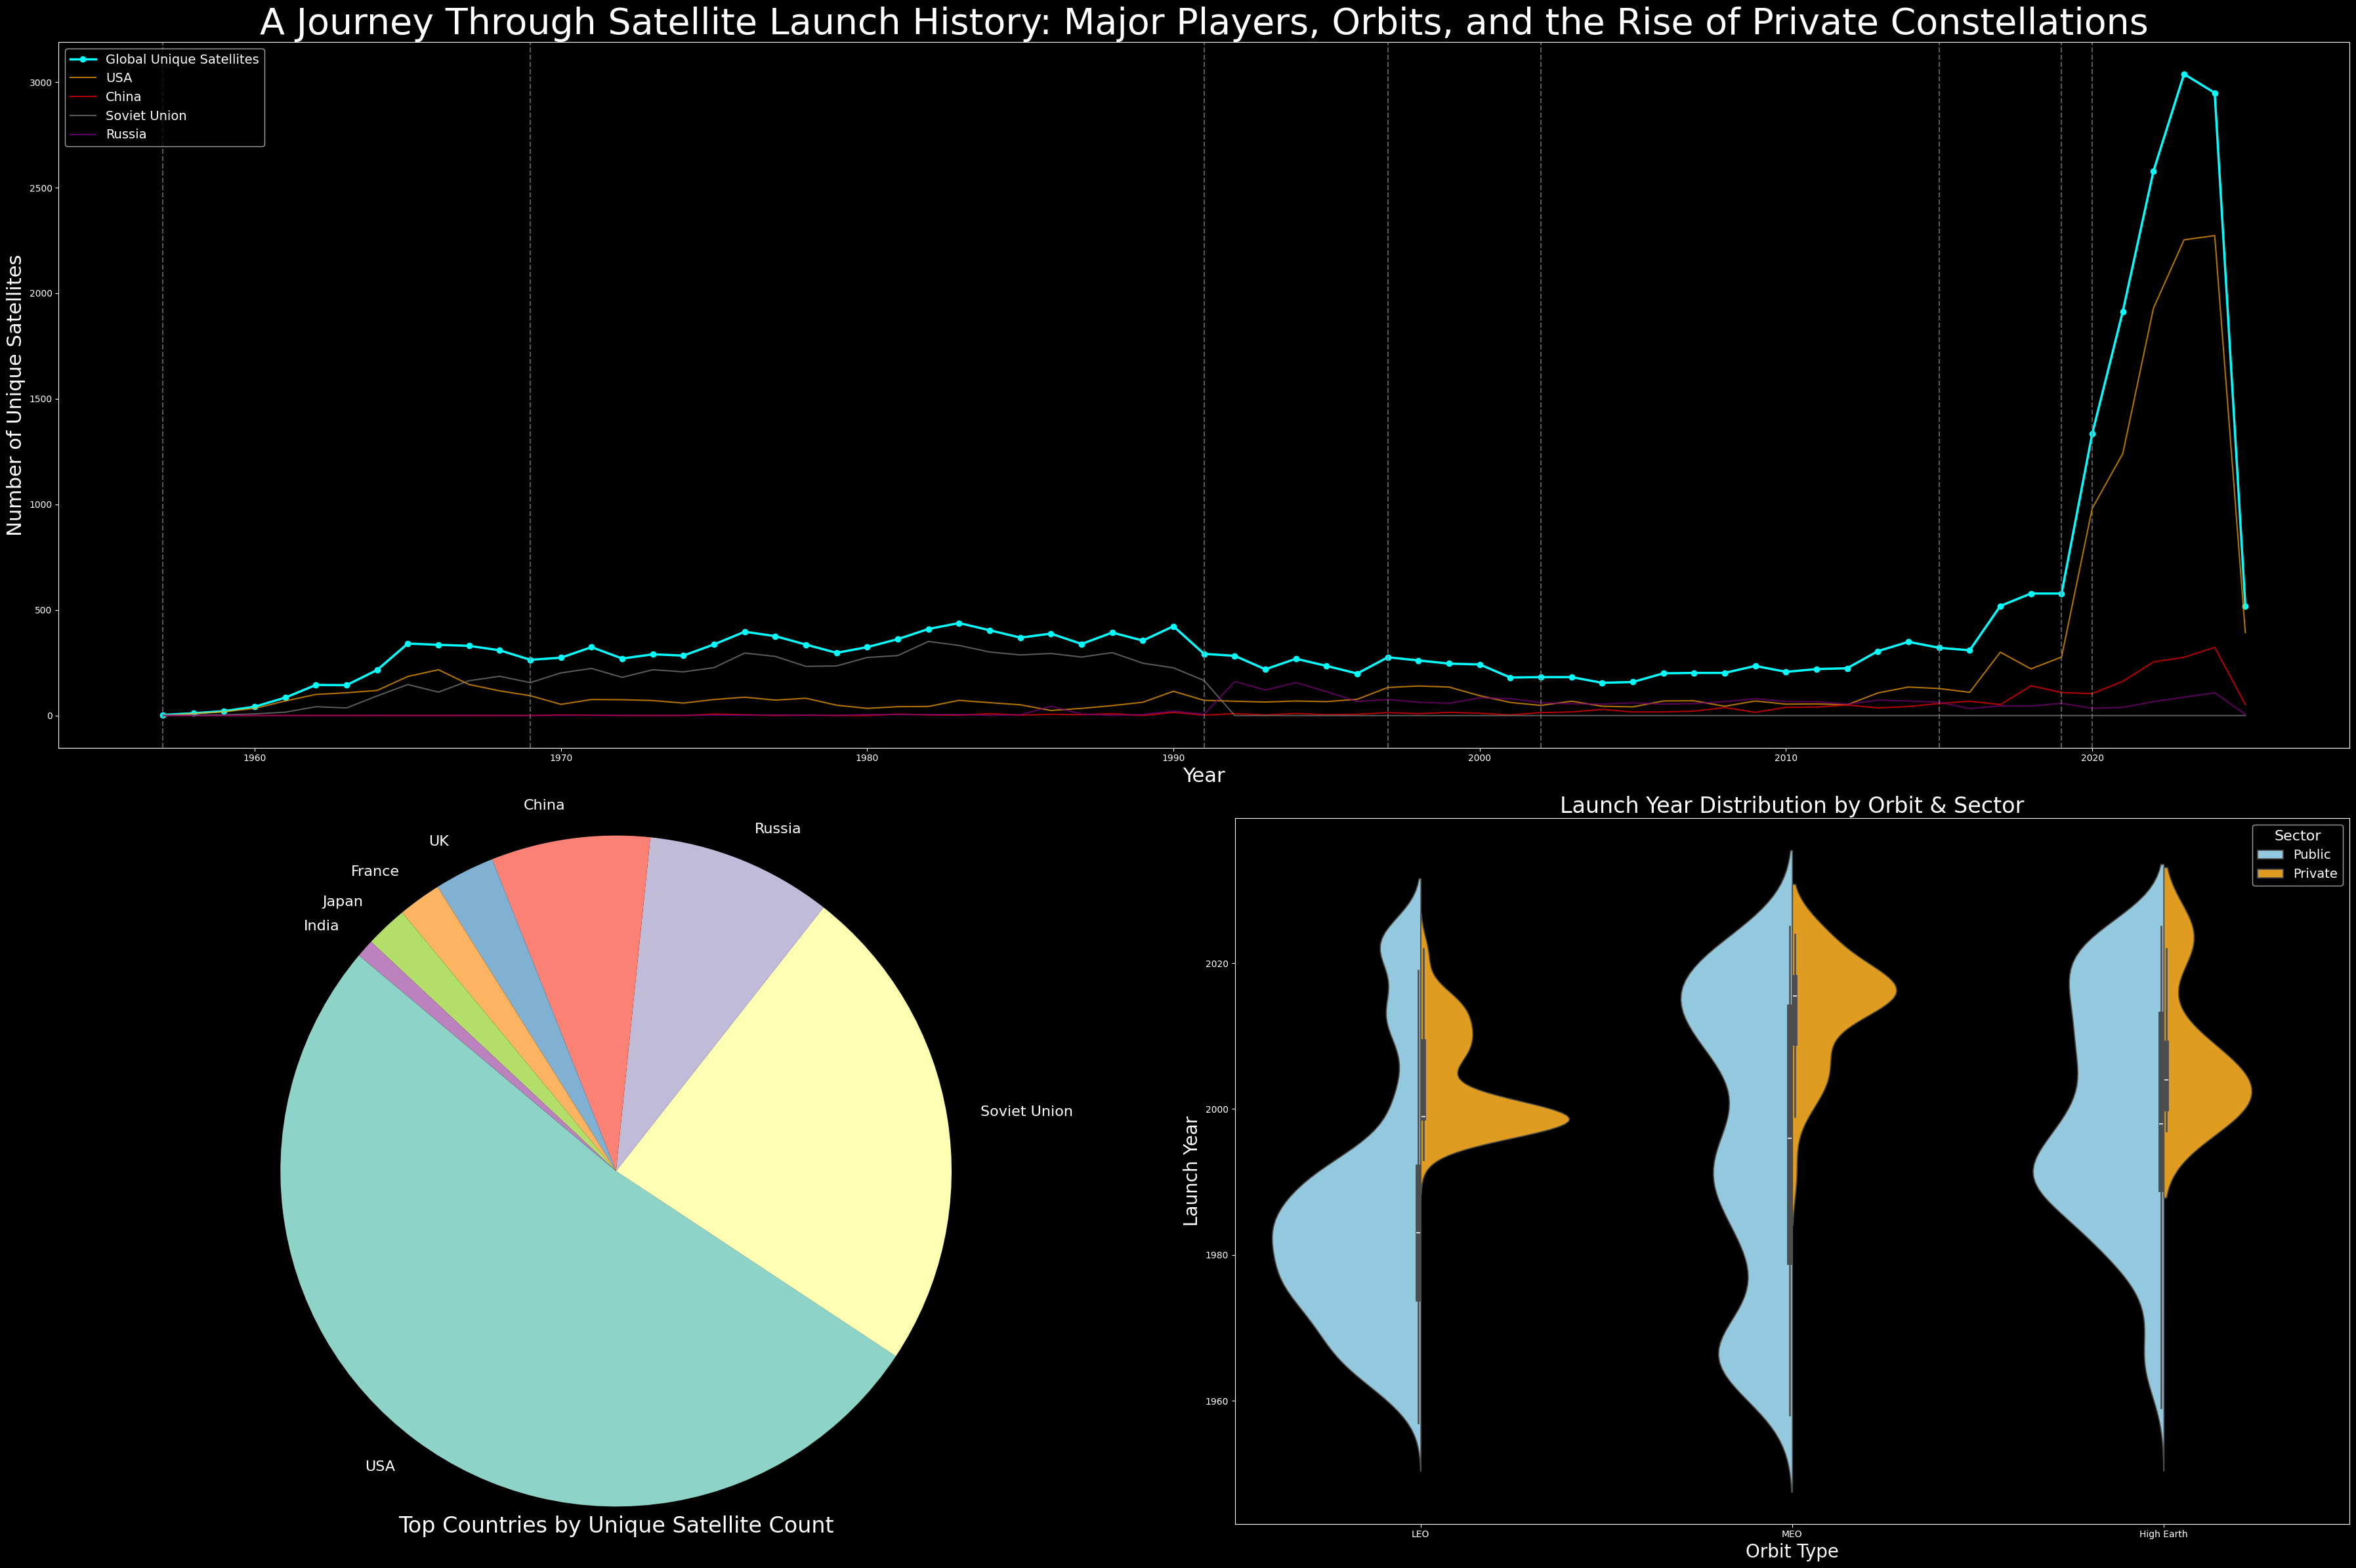

In [10]:
# we will create 3 visualiztion and divide the fig into 3 parts
fig = plt.figure(figsize=(36,24))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

#launch over time plot
ax0 = fig.add_subplot(gs[0, :])
ax0.plot(total_launches_per_year.index, total_launches_per_year.values, lw=2.5, marker="o", color="cyan", label="Global Unique Satellites")

colors = {"USA": "orange", "China": "red", "Russia": "purple", "Soviet Union": "gray"}

for country in countries:
    if country in country_launch_trends.columns:
        ax0.plot(country_launch_trends.index, country_launch_trends[country], label=country, lw=1.5, alpha=0.7, color=colors.get(country, "white"))

ax0.set_title("A Journey Through Satellite Launch History: Major Players, Orbits, and the Rise of Private Constellations", fontsize=40)
ax0.set_xlabel("Year", fontsize=22)
ax0.set_ylabel("Number of Unique Satellites", fontsize=22)
ax0.legend(fontsize=14)
ax0.grid(False)

#draw the year lines
for year in events:
    ax0.axvline(x=year, color="gray", linestyle="--", alpha=0.7)
    

#pie chart
ax1 = fig.add_subplot(gs[1, 0])
ax1.pie(top_countries["Count"],labels=top_countries["CountryLabel"],startangle=140,textprops={"fontsize": 16})
ax1.set_title("Top Countries by Unique Satellite Count", y =-0.02, fontsize=24)
ax1.axis("equal")
ax1.grid(False)

# violin plot 
ax2 = fig.add_subplot(gs[1, 1])
sns.violinplot(data=df_unique_orbits, x="OpOrbitClean", y="Year",
    hue="Sector", split=True, palette={"Public": "skyblue", "Private": "orange"}, ax=ax2)
ax2.set_title("Launch Year Distribution by Orbit & Sector", fontsize=24)
ax2.set_xlabel("Orbit Type", fontsize=20)
ax2.set_ylabel("Launch Year", fontsize=20)
ax2.legend(title="Sector", fontsize=14, title_fontsize=16)
ax2.grid(False)

plt.tight_layout()
plt.savefig("satellite_infographic.png", dpi=300)
plt.show()

